## Building regression models for boston dataset

### Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

### Load Boston dataset

In [2]:
boston = datasets.load_boston()

In [ ]:
boston

### Exploring the data

In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
boston.data.shape

(506, 13)

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [13]:
#bostondf = pd.DataFrame(boston.data)
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
bostondf.columns = boston.feature_names

In [14]:
bostondf['PRICE']=boston.target

In [15]:
bostondf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Splitting data into train and test

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(boston.data, boston.target, random_state=2)
print(Xtrain.shape, Xtest.shape)

(379, 13) (127, 13)


### LinearRegression with default hyperparameters

#### Fit a model on train

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
lr.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
lr.intercept_

38.116141265080785

In [21]:
lr.coef_

array([-9.81915048e-02,  3.48400626e-02, -1.65945367e-02,  3.36283135e+00,
       -1.61477570e+01,  3.57041012e+00,  4.56458846e-03, -1.39585375e+00,
        3.15975518e-01, -1.20505823e-02, -1.04852815e+00,  1.14536184e-02,
       -5.52653040e-01])

#### Create df of coefficien

In [22]:
coefficients = pd.DataFrame(lr.coef_, index = boston.feature_names, columns = ['Coefficients'])
coefficients

,Coefficients
CRIM,-0.098192
ZN,0.034840
INDUS,-0.016595
CHAS,3.362831
NOX,-16.147757
RM,3.570410
AGE,0.004565
DIS,-1.395854
RAD,0.315976
TAX,-0.012051


#### Print the model score (R^2) on train and test

In [23]:
print('train R^2', lr.score(Xtrain, ytrain))
print('test R^2', lr.score(Xtest, ytest))

train R^2 0.7341220456408117
test R^2 0.7503116174489225


#### Predict on test, print MAE and MSE on test

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [25]:
ytest_pred =  lr.predict(Xtest)

In [26]:
print("Mean absolute error", mean_absolute_error(ytest, ytest_pred))
print("Mean square error", mean_squared_error(ytest, ytest_pred))

Mean absolute error 3.241656596795038
Mean square error 22.16019830487558


#### Plot test predictions

Text(0, 0.5, 'Predicted')

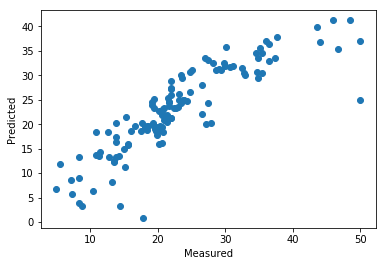

In [30]:
plt.scatter(ytest, ytest_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')

#### Create df of coefficients

In [32]:
coefficients = pd.DataFrame(lr.coef_, index = boston.feature_names, columns = ['Coefficients'])
coefficients

,Coefficients
CRIM,-0.098192
ZN,0.034840
INDUS,-0.016595
CHAS,3.362831
NOX,-16.147757
RM,3.570410
AGE,0.004565
DIS,-1.395854
RAD,0.315976
TAX,-0.012051


### LinearRegression with normalization

In [33]:
lrn = LinearRegression(normalize = True)

In [39]:
lrn.fit(Xtrain, ytrain)
print(lrn.score(Xtrain, ytrain))
lrn.score(Xtest, ytest)

0.7341220456408117


0.7503116174489232

### LinearRegression with PolynomialFeatures (n=2)

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
lrpf2 = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

In [43]:
lrpf2.fit(Xtrain, ytrain)
print(lrpf2.score(Xtrain, ytrain))
lrpf2.score(Xtest, ytest)

0.9448312647133564


0.8110446780608238

### For Ridge and Lasso try different alpha (e.g. 0.1, 1, 10, 100)

### Ridge with PolynomialFeatures (n=2)

In [60]:
from sklearn.linear_model import Ridge
alpha = [0.1, 1, 10, 100];
for i in alpha:
    poly = make_pipeline(PolynomialFeatures(2), Ridge(alpha=i))
    poly.fit(Xtrain, ytrain)
    print("alpha = ", i)
    print("R^2 train:", poly.score(Xtrain, ytrain))
    print("R^2 test:", poly.score(Xtest, ytest))
                         


alpha =  0.1
R^2 train: 0.9403511022488769
R^2 test: 0.8440678314252331
alpha =  1
R^2 train: 0.9357293176194068
R^2 test: 0.8485097574896303
alpha =  10
R^2 train: 0.9271252514161168
R^2 test: 0.8670001849560629
alpha =  100
R^2 train: 0.9123789369883977
R^2 test: 0.8625424066157158


### Lasso with PolynomialFeatures (n=2)

In [61]:
from sklearn.linear_model import Lasso
alpha = [0.1, 1, 10, 100];
for i in alpha:
    poly = make_pipeline(PolynomialFeatures(2), Lasso(alpha=i, tol = 0.1))
    poly.fit(Xtrain, ytrain)
    print("alpha = ", i)
    print("R^2 train:", poly.score(Xtrain, ytrain))
    print("R^2 test:", poly.score(Xtest, ytest))


alpha =  0.1
R^2 train: 0.8356089041403196
R^2 test: 0.8092397964518668
alpha =  1
R^2 train: 0.8441970550860617
R^2 test: 0.8338807434123425
alpha =  10
R^2 train: 0.839504270247023
R^2 test: 0.8270534380606134
alpha =  100
R^2 train: 0.7681274875279698
R^2 test: 0.788619123867277
